In [70]:
import os
import random
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import L2

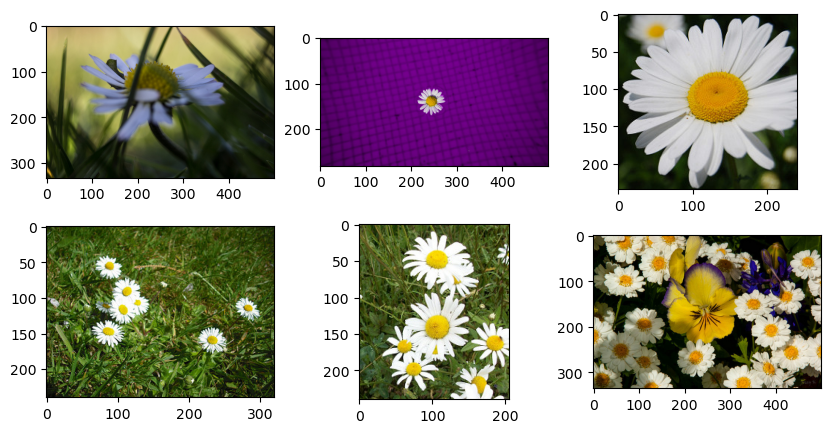

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

path = "/home/data/Documents/new/data/train/daisy/"
for i, ax in enumerate(axes.flat):
    files = random.choices(os.listdir(path), k=6)
    files = [path+file for file in files]
    ax.imshow(plt.imread(files[i]))

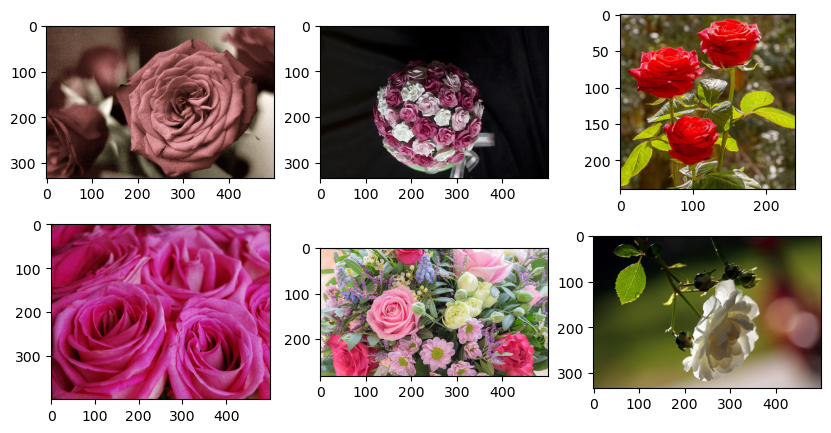

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

path = "/home/data/Documents/new/data/train/rose/"
for i, ax in enumerate(axes.flat):
    files = random.choices(os.listdir(path), k=6)
    files = [path+file for file in files]
    ax.imshow(plt.imread(files[i]))
    

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
TARGET_SIZE = (299, 299)
SEED = 42

In [76]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.15)

train_batches = train_generator.flow_from_directory(
    directory="/home/data/Documents/new/data/train/",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=100,
    seed=SEED,
    subset='training')

valid_batches=train_generator.flow_from_directory(
    directory="/home/data/Documents/new/data/train/",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=30,
    seed=SEED,
    subset='validation')

Found 2336 images belonging to 5 classes.
Found 410 images belonging to 5 classes.


In [77]:
# x,y_1 = train_batches.next()

In [78]:
# x.shape

In [79]:
test_generator = ImageDataGenerator(rescale=1/255.)  

test_batches = test_generator.flow_from_directory(
    directory="/home/data/Documents/new/data/test/",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    batch_size=100,
    #classes=['test'],
    class_mode='categorical',
    seed=SEED,
    shuffle=True)

Found 100 images belonging to 5 classes.


In [80]:
model = Sequential([
    Conv2D(filters=124, kernel_size=(3,3), strides=(1,1), padding='valid',activation= 'relu', input_shape=[299,299,3]),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    
    Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),

    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

In [81]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 297, 297, 124)     3472      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 124)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 99, 99, 124)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        71488     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 32, 32, 64)       

In [83]:
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    batch_size=16,
    epochs=10
)


Epoch 1/10


2023-07-24 13:08:21.440414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - ETA: 0s - loss: 1.6076 - accuracy: 0.2436

2023-07-24 13:10:15.898574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 118s 5s/step - loss: 1.6076 - accuracy: 0.2436 - val_loss: 1.5901 - val_accuracy: 0.2805
Epoch 2/10
24/24 [==============================] - 117s 5s/step - loss: 1.5043 - accuracy: 0.3249 - val_loss: 1.4504 - val_accuracy: 0.4024
Epoch 3/10
24/24 [==============================] - 117s 5s/step - loss: 1.2862 - accuracy: 0.4234 - val_loss: 1.2948 - val_accuracy: 0.4293
Epoch 4/10
24/24 [==============================] - 117s 5s/step - loss: 1.2007 - accuracy: 0.4653 - val_loss: 1.2232 - val_accuracy: 0.4927
Epoch 5/10
24/24 [==============================] - 117s 5s/step - loss: 1.1477 - accuracy: 0.4919 - val_loss: 1.1865 - val_accuracy: 0.4951
Epoch 6/10
24/24 [==============================] - 116s 5s/step - loss: 1.1066 - accuracy: 0.5265 - val_loss: 1.1354 - val_accuracy: 0.5463
Epoch 7/10
24/24 [==============================] - 117s 5s/step - loss: 1.0789 - accuracy: 0.5308 - val_loss: 1.1321 - val_accuracy: 0.5390
Epoch 8/10
24/24 [======

In [84]:
# model.save('my_mode2.h5')

In [85]:
#model = tf.keras.models.load_model('/kaggle/working/my_model.h5')


In [86]:
# Import the required libraries
import numpy as np

# Get the number of test samples (total number of test images)
num_test_samples = len(test_batches.filenames)

if num_test_samples == 0:
    print("The test_batches iterator is empty. No test samples left to iterate over.")
else:
    print(f"There are {num_test_samples} test samples available in the test_batches iterator.")


There are 100 test samples available in the test_batches iterator.


In [87]:
y = ['daisy','dandelion','rose','sunflower','tulip']

In [88]:
type(train_batches)

keras.preprocessing.image.DirectoryIterator

In [89]:
X, Y = test_batches.next()


In [90]:
type(X)

numpy.ndarray

In [91]:
X.shape

(100, 299, 299, 3)

In [92]:
X[0].shape

(299, 299, 3)

In [93]:
img_n = 1

In [94]:
y[np.argmax(model.predict(X)[img_n])]

4/4 [==============================] - 1s 216ms/step


'rose'

In [95]:
X.shape

(100, 299, 299, 3)

In [96]:
for i in range(100):
    print(Y[i])

[0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0

In [97]:
model.predict(X)[img_n]

4/4 [==============================] - 1s 215ms/step


array([0.06076801, 0.1007155 , 0.47278458, 0.01149422, 0.35423768],
      dtype=float32)

In [98]:
mo = model.predict(X)
for i in range(99):
    #plt.imshow(X[i])
    pre = mo[i]
    max_ = np.argmax(pre)
    print(f"{y[np.argmax(pre)]}, Accuracy {pre[max_]*100}, true value : {y[np.argmax(Y[i])]}")
    #plt.xlabel(f"{y[np.argmax(pre)]}, Accuracy {pre[max_]*100}%")

4/4 [==============================] - 1s 216ms/step
rose, Accuracy 64.01404738426208, true value : tulip
rose, Accuracy 47.27845788002014, true value : rose
sunflower, Accuracy 66.02045893669128, true value : sunflower
dandelion, Accuracy 32.73712396621704, true value : rose
tulip, Accuracy 49.6257483959198, true value : rose
dandelion, Accuracy 82.70498514175415, true value : dandelion
dandelion, Accuracy 71.5120792388916, true value : dandelion
rose, Accuracy 48.94864857196808, true value : tulip
daisy, Accuracy 45.600783824920654, true value : daisy
daisy, Accuracy 54.9985408782959, true value : daisy
daisy, Accuracy 63.231050968170166, true value : daisy
dandelion, Accuracy 54.48775887489319, true value : dandelion
sunflower, Accuracy 61.86076998710632, true value : sunflower
dandelion, Accuracy 52.75570750236511, true value : dandelion
rose, Accuracy 62.17559576034546, true value : tulip
dandelion, Accuracy 41.35974943637848, true value : daisy
sunflower, Accuracy 83.999788761138

4/4 [==============================] - 1s 204ms/step


Text(0.5, 0, 'rose, Accuracy 47.27845788002014%')

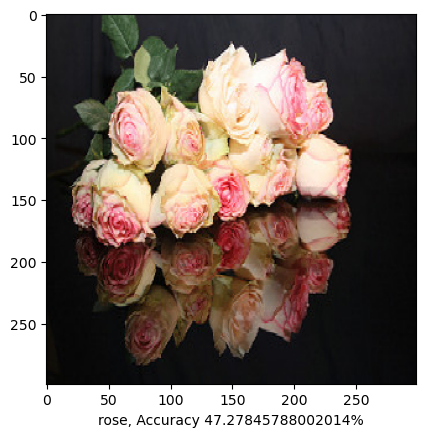

In [101]:
img_n = 1
mo = model.predict(X)
plt.imshow(X[img_n])
pre = mo[img_n]
max_ = np.argmax(pre)
#print(f"{y[np.argmax(pre)]}, Accuracy {pre[max_]*100}, true value : {y[np.argmax(Y[i])]}")
plt.xlabel(f"{y[np.argmax(pre)]}, Accuracy {pre[max_]*100}%")

In [99]:
 #!zip -r file.zip /kaggle/working

	zip warning: name not matched: /kaggle/working

zip error: Nothing to do! (try: zip -r file.zip . -i /kaggle/working)


In [100]:
model.save('my_mode2.h5')